In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [3]:
# define the fonts and colors to use for plots
family = 'Helvetica'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')
bar_edge_color = '#272727'
yellow = '#FFE400'
green = '#14A76C'
orange = '#FF652F'

# Loading source data

In [41]:
# load the messages csv data file
data = pd.read_csv('../resources/messages.csv')

emoji_table = pd.read_csv('../resources/emoji-data-table.csv')

# extract emojis
all_emoji_strings = [*filter(lambda emoji : type(emoji) is str, data['emojis'])]
# convert strings to character lists
all_emojis_2d = [*map(lambda emoji_string : list(emoji_string), all_emoji_strings)]
# flatten 2d list
all_emojis = [item for sublist in all_emojis_2d for item in sublist]

emoji_table

,emoji,hex_string,utf8_string,emoji_desc
0,😀,1F600,\xf0\x9f\x98\x80,grinning face
1,😃,1F603,\xf0\x9f\x98\x83,grinning face with big eyes
2,😄,1F604,\xf0\x9f\x98\x84,grinning face with smiling eyes
3,😁,1F601,\xf0\x9f\x98\x81,beaming face with smiling eyes
4,😆,1F606,\xf0\x9f\x98\x86,grinning squinting face
...,...,...,...,...
4163,🇿🇲,1F1FF 1F1F2,\xf0\x9f\x87\xbf\xf0\x9f\x87\xb2,flag: Zambia
4164,🇿🇼,1F1FF 1F1FC,\xf0\x9f\x87\xbf\xf0\x9f\x87\xbc,flag: Zimbabwe
4165,🏴󠁧󠁢󠁥󠁮󠁧󠁿,1F3F4 E0067 E0062 E0065 E006E E0067 E007F,\xf0\x9f\x8f\xb4\xf3\xa0\x81\xa7\xf3\xa0\x81\x...,flag: England
4166,🏴󠁧󠁢󠁳󠁣󠁴󠁿,1F3F4 E0067 E0062 E0073 E0063 E0074 E007F,\xf0\x9f\x8f\xb4\xf3\xa0\x81\xa7\xf3\xa0\x81\x...,flag: Scotland


{'😘': 1363,
 '😂': 19860,
 '😏': 218,
 '👌': 106,
 '🏻': 452,
 '😬': 93,
 '😁': 1959,
 '😀': 212,
 '😎': 43,
 '😄': 968,
 '😚': 13,
 '👍': 49,
 '🏽': 145,
 '🏼': 339,
 '✋': 500,
 '☺': 417,
 '😱': 115,
 '👊': 38,
 '🏿': 217,
 '🙌': 19,
 '🚀': 10,
 '😵': 9,
 '😌': 56,
 '😯': 19,
 '💯': 5,
 '🐷': 9,
 '😉': 153,
 '😊': 604,
 '😃': 171,
 '😍': 1687,
 '❤': 5369,
 '🔫': 11,
 '😔': 142,
 '💕': 30,
 '😞': 101,
 '😭': 505,
 '💙': 6,
 '✌': 77,
 '😈': 38,
 '🙂': 303,
 '😅': 309,
 '✊': 13,
 '🙏': 101,
 '🤗': 7,
 '😻': 3,
 '☝': 36,
 '🖕': 64,
 '❗': 61,
 '🏾': 56,
 '🤔': 101,
 '😡': 58,
 '😮': 40,
 '😢': 68,
 '🧐': 4,
 '💩': 20,
 '👼': 7,
 '🙄': 68,
 '🐆': 4,
 '😋': 16,
 '😰': 7,
 '🔥': 19,
 '🎁': 7,
 '🎂': 5,
 '🎉': 149,
 '🐿': 2,
 '😒': 74,
 '☀': 11,
 '♥': 26,
 '😐': 49,
 '😶': 26,
 '✨': 5,
 '👥': 2,
 '♂': 15,
 '👏': 32,
 '⚽': 15,
 '🏋': 1,
 '🏀': 44,
 '☠': 2,
 '⚰': 1,
 '🤓': 17,
 '🐐': 3,
 '❣': 8,
 '🙃': 20,
 '😫': 16,
 '®': 5,
 '😕': 151,
 '😇': 58,
 '💪': 45,
 '🤚': 4,
 '😳': 55,
 '🤩': 10,
 '🙁': 17,
 '😟': 9,
 '💁': 7,
 '🤨': 5,
 '🤦': 8,
 '🤷': 14,
 '😝': 22,
 '🤐': 2,
 '💋

In [27]:
emoji_counts = pd.Series(all_emojis).value_counts().sort_values(ascending=False)
print(emoji_counts)

😂    19860
❤     5369
😁     1959
😍     1687
😘     1363
     ...  
🎇        1
⛪        1
⛵        1
💡        1
📭        1
Length: 365, dtype: int64


In [29]:
xlabels = pd.Series(emoji_counts.index[:25])

0     😂
1     ❤
2     😁
3     😍
4     😘
5     😄
6     💋
7     😊
8     😭
9     ✋
10    🏻
11    ☺
12    🏼
13    😅
14    🙂
15    😏
16    🏿
17    😀
18    🐥
19    😃
20    😉
21    😕
22    🎉
23    🏽
24    😔
dtype: object

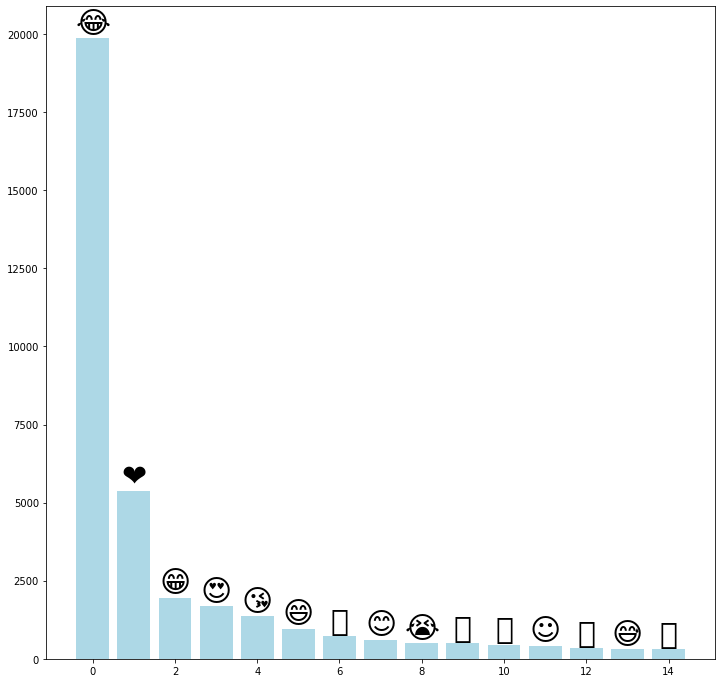

In [39]:

import matplotlib.pyplot as plt, numpy as np
from matplotlib.font_manager import FontProperties

# Load Apple Color Emoji font 


# Set up plot
labels = emoji_counts.index[:15]
freqs = emoji_counts.values[:15]
plt.figure(figsize=(12,12))
p1 = plt.bar(np.arange(len(labels)), freqs, 0.8, color="lightblue")
plt.ylim(0, plt.ylim()[1]+30)

# Make labels
for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=30
    )
    
plt.show()